 Kaggle Dataset

English Premier League Players Dataset, Season 2017/18
A unique dataset containing FPL data, popularity and market values

Overview
The specific objective of this project was to investigate the Market Values variation of different players and what things they depend on/what are the factors affecting them.Our goal was to compare market value of the players. Contested by twenty clubs, it operates on a system of promotion and relegation with the English Football League (EFL).

Context
For most football fans, May - July represents a lull period due to the lack of club football. What makes up for it, is the intense transfer speculation that surrounds all major player transfers today. Their market valuations also lead to a few raised eyebrows, lately more than ever.The questions is how good a proxy popularity could be for ability, and the predictive power it would have in a model estimating a player's market value.

Content
name: Name of the player
club: Club of the player
age : Age of the player
position : The usual position on the pitch

position_cat :

1 for attackers
2 for midfielders
3 for defenders
4 for goalkeepers

market_value : As on transfermrkt.com on July 20th, 2017

page_views : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017

fpl_value : Value in Fantasy Premier League as on July 20th, 2017

fpl_sel : % of FPL players who have selected that player in their team

fpl_points : FPL points accumulated over the previous season

region:

1 for England
2 for EU
3 for Americas
4 for Rest of World

nationality

new_foreign : Whether a new signing from a different league, for 2017/18 (till 20th July)
age_cat
club_id
big_club: Whether one of the Top 6 clubs
new_signing: Whether a new signing for 2017/18 (till 20th July)

Inspiration
To statistically analyse the beautiful game.

Null Hypothesis:There is no significant difference between Market Value and Fantasy premier league value

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import pairplot, heatmap

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
%matplotlib inline
sns.set_style('whitegrid')

init_notebook_mode(connected = True)

In [4]:
epl = pd.read_csv('epldata_final.csv')

In [5]:
epl.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [6]:
epl.describe()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [7]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
name            461 non-null object
club            461 non-null object
age             461 non-null int64
position        461 non-null object
position_cat    461 non-null int64
market_value    461 non-null float64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null object
fpl_points      461 non-null int64
region          460 non-null float64
nationality     461 non-null object
new_foreign     461 non-null int64
age_cat         461 non-null int64
club_id         461 non-null int64
big_club        461 non-null int64
new_signing     461 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 61.3+ KB


In [8]:
#Check for missing values and fixing!
epl.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [9]:
epl[epl['region'].isnull()]

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
188,Steve Mounie,Huddersfield,22,CF,1,5.5,56,6.0,0.60%,0,NaN,Benin,0,2,8,0,0


In [10]:
epl.loc[188,'region']=4

In [11]:
epl.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [12]:
epl.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [13]:
#converting fpl_sel object to float
epl['fpl_sel'] = epl['fpl_sel'].str.rstrip('%').astype('float')/100

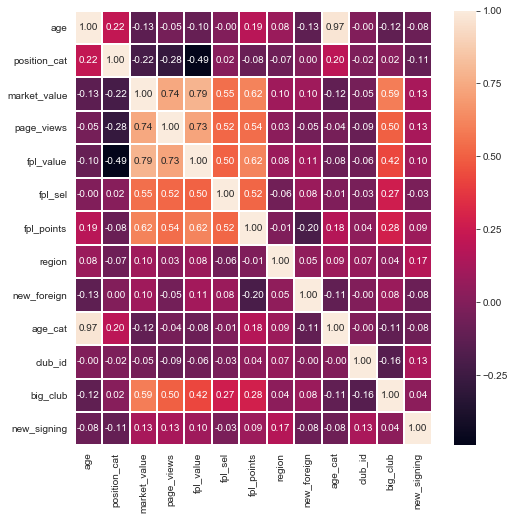

In [14]:
epl.columns #View column names
f,ax = plt.subplots(figsize=(8,8)) #f is figure,ax is axis
sns.heatmap(epl.corr(),annot=True,linewidth=1,fmt=".2f",ax=ax) #
plt.show() #Show plot

In [15]:
#filtering dataset for relevant features:
epl_var=epl.iloc[:,5:10] 

In [16]:
epl_var['big_club']=epl['big_club']

In [17]:
#Dataset with target to predict and features(predictors):
epl_var.head()

,market_value,page_views,fpl_value,fpl_sel,fpl_points,big_club
0,65.0,4329,12.0,0.171,264,1
1,50.0,4395,9.5,0.056,167,1
2,7.0,1529,5.5,0.059,134,1
3,20.0,2393,7.5,0.015,122,1
4,22.0,912,6.0,0.007,121,1


In [18]:
epl_var.columns

Index(['market_value', 'page_views', 'fpl_value', 'fpl_sel', 'fpl_points',
       'big_club'],
      dtype='object')

DATA VISUALIZATION

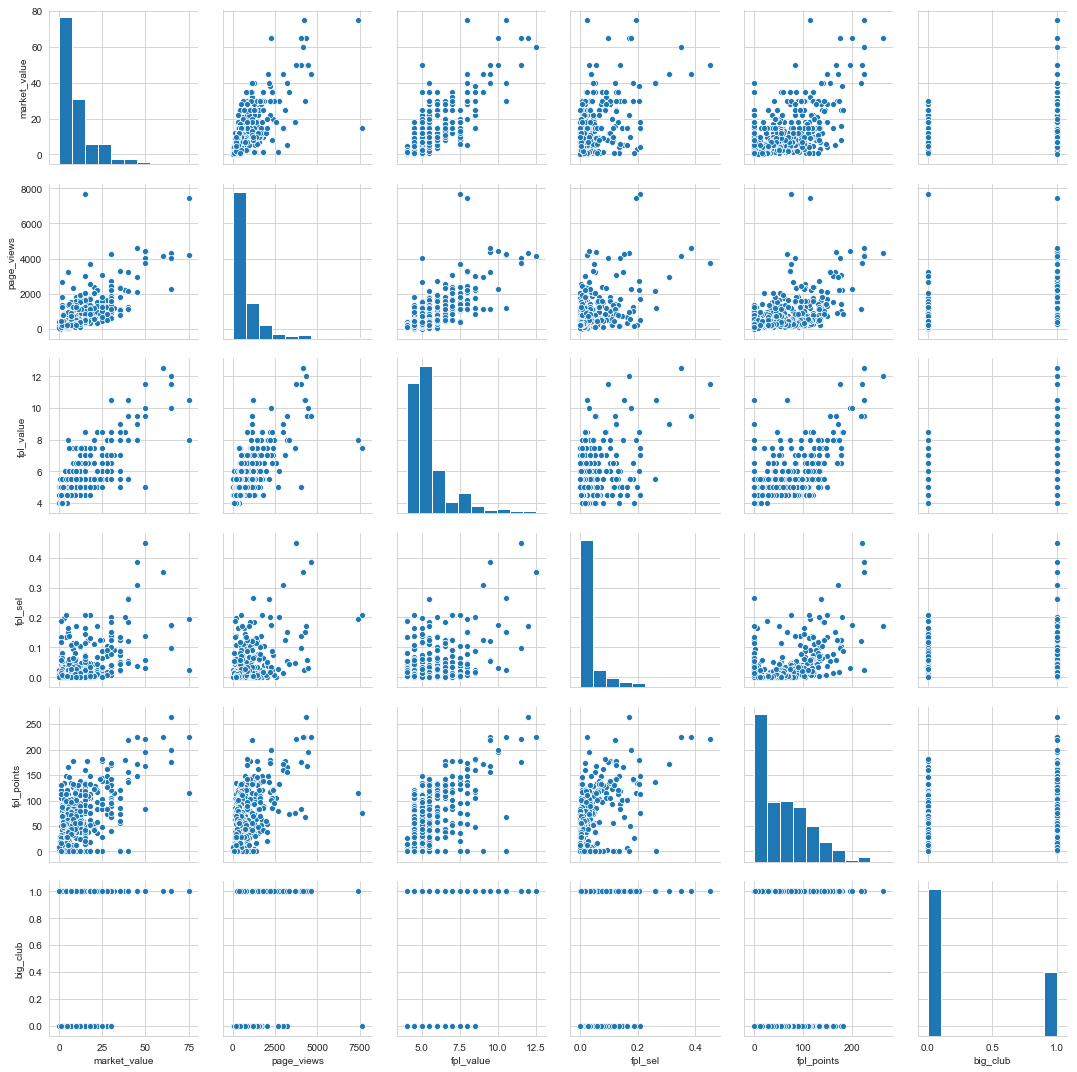

In [19]:
sns.pairplot(epl_var, kind='scatter')

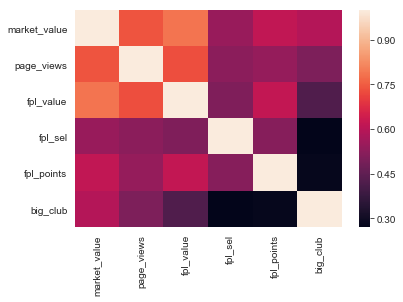

In [20]:
heatmap(epl_var.corr())

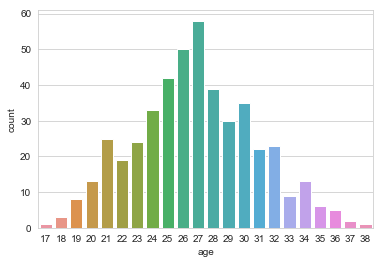

In [21]:
#Count of players age
sns.countplot(x='age',data=epl)

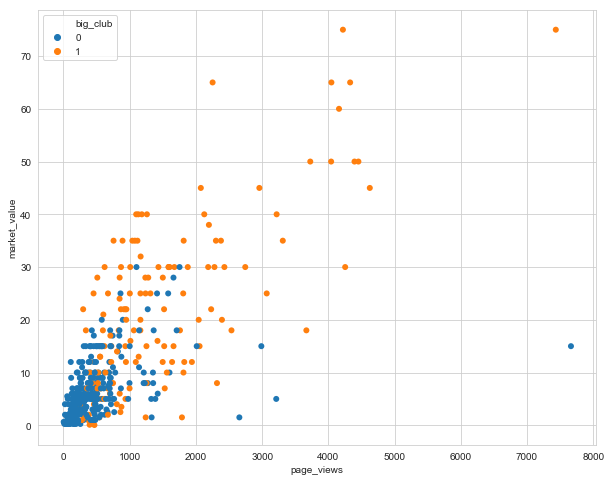

In [22]:
#Market value, related to big clubs,is insreasing with the number of page hits. 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=epl, x='page_views',y='market_value',hue='big_club', sizes=(1, 15), linewidth=0)

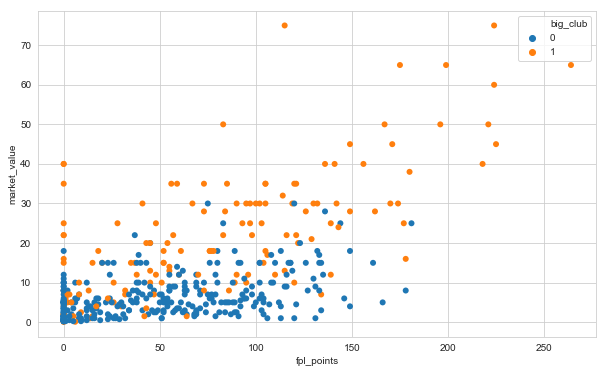

In [23]:
#Players, in big club , score more points 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=epl, x='fpl_points',y='market_value',hue='big_club',sizes=(1, 15), linewidth=0)

<Figure size 720x8496 with 0 Axes>

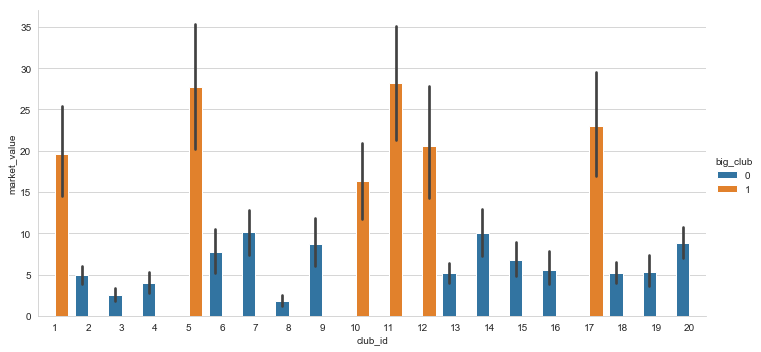

In [24]:
#Average market value is signiticant for big clubs
plt.figure(figsize=(10, 118))
sns.catplot(data=epl, x='club_id', y= 'market_value', kind = 'bar', aspect=2, hue = 'big_club')

In [25]:
#List of all clubs and their average market value
club_market_value = epl.groupby(['club'])['market_value'].mean()
club_market_value

club
Arsenal              19.642857
Bournemouth           4.895833
Brighton+and+Hove     2.522727
Burnley               3.958333
Chelsea              27.677500
Crystal+Palace        7.726190
Everton              10.098214
Huddersfield          1.791071
Leicester+City        8.645833
Liverpool            16.314815
Manchester+City      28.200000
Manchester+United    20.564000
Newcastle+United      5.202381
Southampton          10.000000
Stoke+City            6.818182
Swansea               5.560000
Tottenham            23.000000
Watford               5.166667
West+Brom             5.328947
West+Ham              8.818182
Name: market_value, dtype: float64

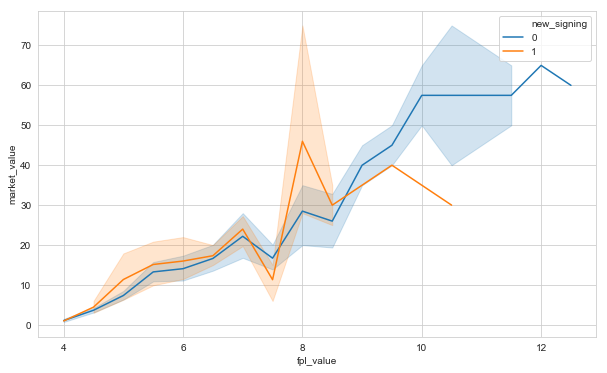

In [26]:
#With market value increasing, posiblilty of signing to new club is reducing.
plt.figure(figsize=(10, 6))
sns.lineplot(x='fpl_value', y='market_value', data=epl, hue = 'new_signing')

<Figure size 720x864 with 0 Axes>

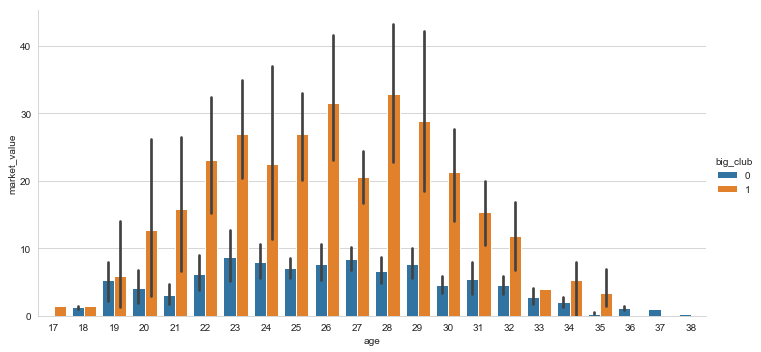

In [27]:
plt.figure(figsize=(10, 12))
sns.catplot(data=epl, x='age', y= 'market_value', kind = 'bar', aspect=2, hue = 'big_club')

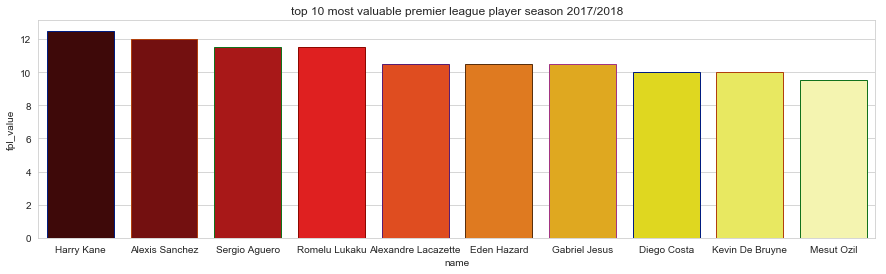

In [28]:
eplview = epl.nlargest(10, 'fpl_value').sort_values('fpl_value',ascending=False)
plt.subplots(figsize=(15,4))
sns.barplot(x="name", y="fpl_value",  data=eplview ,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.title('top 10 most valuable premier league player season 2017/2018')
plt.show()

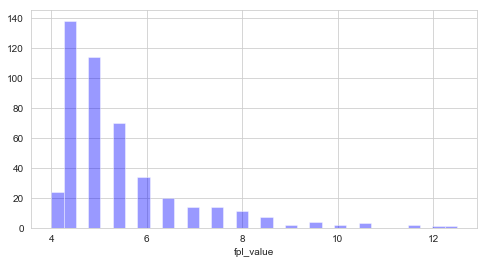

In [29]:
plt.figure(figsize=(8, 4))
av = sns.distplot(epl['fpl_value'],color='b', kde=False)

<Figure size 864x720 with 0 Axes>

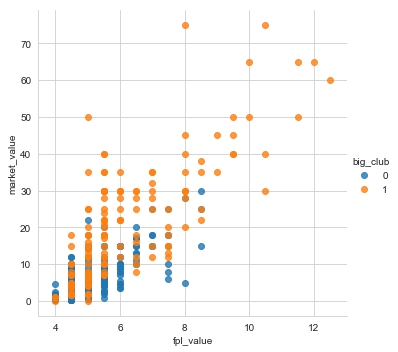

In [30]:
#Relation between value in Fantsasy-Premier-League and the market value(transfermrkt.com)
plt.figure(figsize=(12, 10))
sns.lmplot('fpl_value', 'market_value', data=epl_var, fit_reg=False, hue = 'big_club')

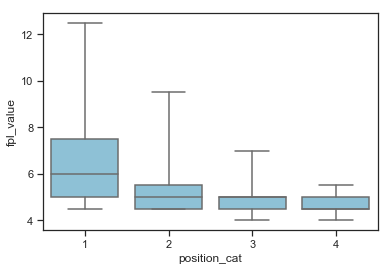

In [31]:
#Players position vs fpl_value
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(data=epl, x="position_cat", y="fpl_value", whis=np.inf, color="c")

In [32]:
#Choosing Multiple Linear REGRESSION
#how strong is correlation between market value and variables
y = epl_var['market_value']
x1 = epl_var['page_views']
x2 = epl_var['fpl_value']
x3 = epl_var['big_club']
x5 = epl_var['fpl_points']

In [33]:
np.corrcoef(x1,y)

array([[1.        , 0.73965652],
       [0.73965652, 1.        ]])

In [34]:
np.corrcoef(x2,y)

array([[1.        , 0.78865341],
       [0.78865341, 1.        ]])

In [35]:
np.corrcoef(x3,y)

array([[1.        , 0.59348296],
       [0.59348296, 1.        ]])

In [36]:
np.corrcoef(x5,y)

array([[1.        , 0.61515453],
       [0.61515453, 1.        ]])

In [37]:
np.corrcoef(x2,x5)

array([[1.        , 0.61883687],
       [0.61883687, 1.        ]])

In [38]:
# Conclusion: There is correlation between market_value and features fpl_points,page_views,fpl_value and big_club

# Linear regression Statsmodels

Hypothsis Null: There is no significant difference between Market value and Page views, points, players value and big EPL club

In [39]:
import statsmodels.formula.api as smf  # import the formula tools

In [41]:
#First StatsModel
epl_reg1 = smf.ols("market_value ~ page_views + fpl_value + fpl_sel + fpl_points + big_club" , data=epl_var).fit()  # this is a shortcut to the above
epl_reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           market_value   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     277.6
Date:                Sun, 29 Mar 2020   Prob (F-statistic):          1.04e-135
Time:                        18:04:06   Log-Likelihood:                -1486.5
No. Observations:                 461   AIC:                             2985.
Df Residuals:                     455   BIC:                             3010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.6883      1.544    -10.161      0.000     -18.722     -12.654
page_views     0.0024      0.000      4.785      0.000       0.001       0.003
fpl_value      3.7103      0.340     10.910      0.000       3.042       4.379
fpl_sel       23.1956      6.278      3.695      0.000      10.859      35.532
fpl_points     0.0315      0.007      4.369      0.000       0.017       0.046
big_club       7.0227      0.721      9.738      0.000       5.606       8.440
==============================================================================
Omnibus:                       60.920   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.072
Skew:                           0.478   Prob(JB):                     1.67e-58
Kurtosis:                       6.597   Cond. No.                     2.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We rejected Nul Hyphotesis since P-value < 0.05.
 R-squared are 0.753 , coefficient of determination is closer to 1 , so variation of independent variable is more related to a variation of dependent variable.

In [42]:
epl_var.head()

,market_value,page_views,fpl_value,fpl_sel,fpl_points,big_club
0,65.0,4329,12.0,0.171,264,1
1,50.0,4395,9.5,0.056,167,1
2,7.0,1529,5.5,0.059,134,1
3,20.0,2393,7.5,0.015,122,1
4,22.0,912,6.0,0.007,121,1


Implementing training/test model

In [43]:
X=epl_var.iloc[:,1:6].values

In [44]:
y=epl_var.iloc[:,0].values

In [51]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import model_selection, metrics

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [53]:
#Fitting Simple Linear regression data model to train data set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor=LinearRegression()
regressor.fit(X_train,y_train)

#predict the test set
y_pred_test_data=regressor.predict(X_test)

In [54]:
print(regressor.intercept_)

-15.809885594759507


In [55]:
print(regressor.coef_)

[2.70691078e-03 3.75736962e+00 2.19344642e+01 2.87040742e-02
 6.88329367e+00]


In [56]:
#Calculate MSE and RMSE
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test_data))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test_data)))

MSE: 40.6409717021035
RMSE: 6.3750271922638495


In [57]:
r2_score = regressor.score(X_test,y_test)
print('Test score: ', r2_score)
r2_score = regressor.score(X_train,y_train)
print('Train score: ',r2_score)

Test score:  0.6999508652383324
Train score:  0.7636816741582487


In [58]:
lin_accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 5)
print('Mean Accuracy of all 5 folds:',lin_accuracies.mean())

Mean Accuracy of all 5 folds: 0.7414196316203822


In [59]:
res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_data})
res

,Actual,Predicted
0,15.00,15.570921
1,32.00,25.774913
2,10.00,10.965898
3,0.50,3.397092
4,3.50,1.631872
5,10.00,12.083427
6,28.00,17.574900
7,30.00,17.014177
8,1.50,3.234398
9,2.50,3.205349


RANDOM FOREST Regression

In [61]:
epl_var.head()

,market_value,page_views,fpl_value,fpl_sel,fpl_points,big_club
0,65.0,4329,12.0,0.171,264,1
1,50.0,4395,9.5,0.056,167,1
2,7.0,1529,5.5,0.059,134,1
3,20.0,2393,7.5,0.015,122,1
4,22.0,912,6.0,0.007,121,1


In [62]:
Xr = epl_var.iloc[:,1:].values
yr = epl_var.iloc[:,0].values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, test_size = 0.2, random_state = 1)

In [63]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [64]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators = 300, random_state = 0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
# Predicting a new result
y_pred = regr.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regr, X = X_train, y = y_train, cv = 5)
print('Mean Accuracy of all 5 folds:',accuracies.mean())

Mean Accuracy of all 5 folds: 0.7135280084593681


In [66]:
regr.score(X_test,y_test)

0.7026254785675987

In [67]:
regr.score(X_train,y_train)

0.9604122801909948

In [68]:
pr1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pr1

,Actual,Predicted
0,15.00,13.598333
1,32.00,27.033333
2,10.00,14.255000
3,0.50,3.005500
4,3.50,1.249167
5,10.00,14.760000
6,28.00,20.110000
7,30.00,14.798333
8,1.50,1.702472
9,2.50,4.362500


In [ ]:
#Conclusion: Linear Regression model should be a better choice. It shows better cross validation results.